In [1]:
import pandas as pd
import matplotlib.pyplot as plott
import numpy as np
from collections import defaultdict
from matplotlib import cm
from upsetplot import UpSet
from pywaffle import Waffle

In [2]:
htodemul_hashes = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results-cluster/results_1/results/classification_hash.csv")
htodemul_results= pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results-cluster/results_1/results/resultHTO.csv")
multiseq_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results-cluster/results_1/results/resultMulti.csv")
hasheddrops_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results-cluster/results_1/results/resultHashed.csv")
demuxem_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results-cluster/results_1/results/demuxEm.csv")
hashsolo_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results-cluster/results_1/results/hash_solo.csv")

<h2> Change column names for files </h2>

In [3]:
htodemul_results.columns = ["Barcode_htoDemux","HTODemux"]
htodemul_results

,Barcode_htoDemux,HTODemux
0,AAACCCAAGGTGTGAC-1,Doublet
1,AAACCCAGTGAGAGGG-1,Doublet
2,AAACGAAAGAATCTAG-1,Doublet
3,AAACGAACACATATGC-1,Doublet
4,AAACGAACACGACTAT-1,Doublet
...,...,...
4873,TTTGTTGAGTCCCAGC-1,Doublet
4874,TTTGTTGCAGCGCGTT-1,Doublet
4875,TTTGTTGGTTATCTTC-1,Doublet
4876,TTTGTTGTCCAGTGTA-1,Doublet


In [4]:
htodemul_hashes.columns = ["Barcode_htoDemux","Assignment-htoDemux"]
htodemul_hashes

,Barcode_htoDemux,Assignment-htoDemux
0,AAACCCAAGGTGTGAC-1,Hash454-TotalSeqA_Hash455-TotalSeqA
1,AAACCCAGTGAGAGGG-1,Hash453-TotalSeqA_Hash455-TotalSeqA
2,AAACGAAAGAATCTAG-1,Hash453-TotalSeqA_Hash455-TotalSeqA
3,AAACGAACACATATGC-1,Hash452-TotalSeqA_Hash456-TotalSeqA
4,AAACGAACACGACTAT-1,Hash452-TotalSeqA_Hash455-TotalSeqA
...,...,...
4873,TTTGTTGAGTCCCAGC-1,Hash451-TotalSeqA_Hash456-TotalSeqA
4874,TTTGTTGCAGCGCGTT-1,Hash451-TotalSeqA_Hash454-TotalSeqA
4875,TTTGTTGGTTATCTTC-1,Hash452-TotalSeqA_Hash453-TotalSeqA
4876,TTTGTTGTCCAGTGTA-1,Hash453-TotalSeqA_Hash454-TotalSeqA


In [5]:
multiseq_hashes = multiseq_results.copy()
multiseq_hashes.columns = ["Barcode_multi","Assignment-multiseq"]

In [6]:
multiseq_results.columns = ["Barcode_multi","MultiSeq"]
multiseq_results.loc[multiseq_results['MultiSeq'].str.contains('Hash'), 'MultiSeq'] = 'Singlet'

In [7]:
demuxem_hashes = demuxem_results.copy()
del demuxem_hashes['n_genes']
del demuxem_hashes['n_counts']
del demuxem_hashes['passed_qc']
del demuxem_hashes['demux_type']
demuxem_hashes.columns = ["Barcode_demux","Assignment-demuxem"]

In [8]:
del demuxem_results['n_genes']
del demuxem_results['n_counts']
del demuxem_results['passed_qc']
del demuxem_results['assignment']
demuxem_results.columns = ["Barcode_demux","DemuxEM"]

In [9]:
demuxem_results.loc[demuxem_results['DemuxEM'].str.contains('doublet'), 'DemuxEM'] = 'Doublet'
demuxem_results.loc[demuxem_results['DemuxEM'].str.contains('singlet'), 'DemuxEM'] = 'Singlet'
demuxem_results.loc[demuxem_results['DemuxEM'].str.contains('unknown'), 'DemuxEM'] = 'Negative'
demuxem_results.head()

,Barcode_demux,DemuxEM
0,AAACCCAAGGTGTGAC,Doublet
1,AAACCCAGTGAGAGGG,Singlet
2,AAACGAAAGAATCTAG,Negative
3,AAACGAACACATATGC,Negative
4,AAACGAACACGACTAT,Singlet


In [10]:
#Tranform singlet - doublet column into 1s and 0s
hasheddrops_results["Doublet"] = hasheddrops_results["Doublet"].astype(int)
hasheddrops_results["Confident"] = hasheddrops_results["Confident"].astype(int)

In [11]:
#List of conditions to be applied between singlet and doublet columns, so that we can determine which one is which
condlist = [(hasheddrops_results['Doublet']>hasheddrops_results['Confident']),(hasheddrops_results['Doublet']<hasheddrops_results['Confident']),(hasheddrops_results['Doublet']==hasheddrops_results['Confident'])]

In [12]:
#List with the classification labels
choicelist = ["Doublet", "Singlet","Negative"]
hasheddrops_results['HashedDrops'] = np.select(condlist, choicelist, default=0)

In [13]:
hasheddrops_hashes = hasheddrops_results.copy()
del hasheddrops_hashes['Total']
del hasheddrops_hashes['Second']
del hasheddrops_hashes['LogFC']
del hasheddrops_hashes['LogFC2']
del hasheddrops_hashes['Doublet']
del hasheddrops_hashes['Confident']
del hasheddrops_hashes['HashedDrops']
hasheddrops_hashes.columns = ["Barcode_hashed","Assignment-hashed"] 

In [14]:


del hasheddrops_results['Total']
del hasheddrops_results['Best']
del hasheddrops_results['Second']
del hasheddrops_results['LogFC']
del hasheddrops_results['LogFC2']
del hasheddrops_results['Doublet']
del hasheddrops_results['Confident']
hasheddrops_results.columns = ["Barcode_hashed","HashedDrops",]

In [15]:
hashsolo_hash = hashsolo_results.copy()
del hashsolo_hash["most_likely_hypothesis"]
del hashsolo_hash["cluster_feature"]
del hashsolo_hash["negative_hypothesis_probability"]
del hashsolo_hash["singlet_hypothesis_probability"]
del hashsolo_hash["doublet_hypothesis_probability"]

In [16]:
#hashsolo_results
hashsolo_hash.columns = ["Barcode_hashsolo","Assignment-hashsolo"]
hashsolo_hash

,Barcode_hashsolo,Assignment-hashsolo
0,AAACCCAAGACCATGG,Hash453_TotalSeqA
1,AAACCCAAGACCTGGA,Hash453_TotalSeqA
2,AAACCCAAGAGAGCAA,Hash453_TotalSeqA
3,AAACCCAAGAGATGCC,Hash453_TotalSeqA
4,AAACCCAAGATGAACT,Hash453_TotalSeqA
...,...,...
90905,TTTGTTGTCGCTTAAG,Hash453_TotalSeqA
90906,TTTGTTGTCGTTGCCT,Hash453_TotalSeqA
90907,TTTGTTGTCTACGGTA,Hash453_TotalSeqA
90908,TTTGTTGTCTAGTGTG,Hash453_TotalSeqA


In [17]:
del hashsolo_results["cluster_feature"]
del hashsolo_results["negative_hypothesis_probability"]
del hashsolo_results["singlet_hypothesis_probability"]
del hashsolo_results["doublet_hypothesis_probability"]
del hashsolo_results["Classification"]
hashsolo_results.columns = ["Barcode_hashsolo","HashSolo"]

In [18]:
hashsolo_results

,Barcode_hashsolo,HashSolo
0,AAACCCAAGACCATGG,1
1,AAACCCAAGACCTGGA,1
2,AAACCCAAGAGAGCAA,1
3,AAACCCAAGAGATGCC,1
4,AAACCCAAGATGAACT,1
...,...,...
90905,TTTGTTGTCGCTTAAG,1
90906,TTTGTTGTCGTTGCCT,1
90907,TTTGTTGTCTACGGTA,1
90908,TTTGTTGTCTAGTGTG,1


In [19]:
#List of conditions to be applied between singlet and doublet columns, so that we can determine which one is which
condlist_solo = [(hashsolo_results['HashSolo']==1),
                 (hashsolo_results['HashSolo']==0),
                 (hashsolo_results['HashSolo']==2)]

In [20]:
#List with the classification labels
choicelist_solo = ["Singlet", "Negative","Doublet"]
hashsolo_results['HashSolo'] = np.select(condlist_solo, choicelist_solo)

In [21]:
total_classification = pd.concat( [htodemul_results,multiseq_results,hasheddrops_results,demuxem_results,hashsolo_results],axis=1)

In [22]:
total_classification 

,Barcode_htoDemux,HTODemux,Barcode_multi,MultiSeq,Barcode_hashed,HashedDrops,Barcode_demux,DemuxEM,Barcode_hashsolo,HashSolo
0,AAACCCAAGGTGTGAC-1,Doublet,AAACCCAAGGTGTGAC-1,Singlet,AAACCCAAGGTGTGAC-1,Negative,AAACCCAAGGTGTGAC,Doublet,AAACCCAAGACCATGG,Singlet
1,AAACCCAGTGAGAGGG-1,Doublet,AAACCCAGTGAGAGGG-1,Negative,AAACCCAGTGAGAGGG-1,Negative,AAACCCAGTGAGAGGG,Singlet,AAACCCAAGACCTGGA,Singlet
2,AAACGAAAGAATCTAG-1,Doublet,AAACGAAAGAATCTAG-1,Singlet,AAACGAAAGAATCTAG-1,Negative,AAACGAAAGAATCTAG,Negative,AAACCCAAGAGAGCAA,Singlet
3,AAACGAACACATATGC-1,Doublet,AAACGAACACATATGC-1,Negative,AAACGAACACATATGC-1,Negative,AAACGAACACATATGC,Negative,AAACCCAAGAGATGCC,Singlet
4,AAACGAACACGACTAT-1,Doublet,AAACGAACACGACTAT-1,Singlet,AAACGAACACGACTAT-1,Negative,AAACGAACACGACTAT,Singlet,AAACCCAAGATGAACT,Singlet
...,...,...,...,...,...,...,...,...,...,...
90905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTGTTGTCGCTTAAG,Singlet
90906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTGTTGTCGTTGCCT,Singlet
90907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTGTTGTCTACGGTA,Singlet
90908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTGTTGTCTAGTGTG,Singlet


In [23]:
total_singlets = total_classification.copy()
total_doublets = total_classification.copy()
total_negatives = total_classification.copy()

In [24]:
for column in total_singlets[['HTODemux', 'MultiSeq','HashedDrops','DemuxEM','HashSolo']]:
    condlist_singlet = [(total_singlets[column]=="Singlet" ), (total_singlets[column]!="Singlet" )]
    choicelist_singlet = [True,False]
    total_singlets[f"{column}_bin"] = np.select(condlist_singlet, choicelist_singlet, default=0)

In [25]:
for column in total_doublets[['HTODemux', 'MultiSeq','HashedDrops','DemuxEM','HashSolo']]:
    condlist_doublets = [(total_doublets[column]=="Doublet" ), (total_doublets[column]!="Doublet" )]
    choicelist_doublets = [True,False]
    total_doublets[f"{column}_bin"] = np.select(condlist_doublets, choicelist_doublets, default=0)

In [26]:
for column in total_negatives[['HTODemux', 'MultiSeq','HashedDrops','DemuxEM','HashSolo']]:
    condlist_negatives = [(total_doublets[column]=="Negative" ), (total_doublets[column]!="Negative" )]
    choicelist_negatives = [True,False]
    total_negatives[f"{column}_bin"] = np.select(condlist_negatives, choicelist_negatives, default=0)

In [27]:
#The only thing they share in common is the barcode, plus the barcodes from demuxEM that have no relation at all
#so the graph represents how many barcodes were clasified as for example False in all 4 tools and in this way in all 16 possible combinations
#Still using demuxem hashes as blueprint because hashsolo is analysing absolutely everything and the results are not thrustworthy 
a = total_singlets.groupby(["HTODemux_bin", "MultiSeq_bin","HashedDrops_bin","DemuxEM_bin","HashSolo_bin"])["Barcode_demux"].count()

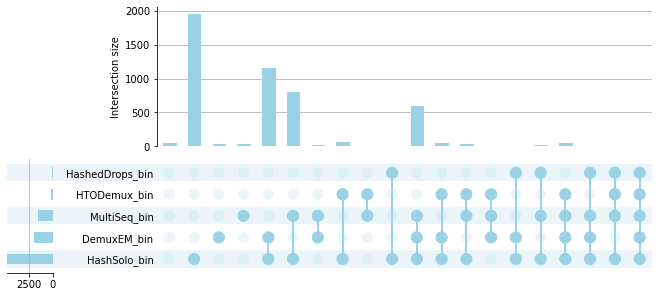

In [28]:
plt = UpSet(a,facecolor="#9BD1E5",shading_color=.2).plot()

In [29]:
a 

HTODemux_bin  MultiSeq_bin  HashedDrops_bin  DemuxEM_bin  HashSolo_bin
0             0             0                0            0                 51
                                                          1               1959
                                             1            0                 30
                                                          1               1163
                            1                0            1                  7
                                             1            1                  7
              1             0                0            0                 27
                                                          1                802
                                             1            0                 22
                                                          1                601
                            1                0            1                 16
                                             1            1 

In [30]:
#The only thing they share in common is the barcode, plus the barcodes from demuxEM that have no relation at all
#so the graph represents how many barcodes were clasified as for example False in all 4 tools and in this way in all 16 possible combinations
b = total_negatives.groupby(["HTODemux_bin", "MultiSeq_bin","HashedDrops_bin","DemuxEM_bin","HashSolo_bin"])["Barcode_demux"].count()

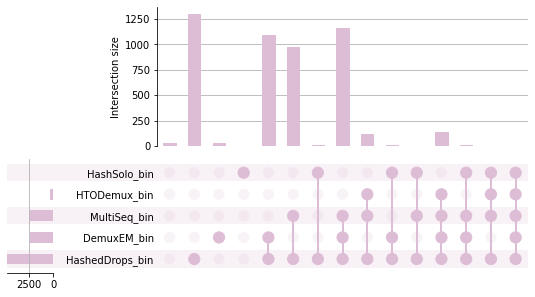

In [31]:
plt2 = UpSet(b,facecolor="#DDBDD5",shading_color=.2).plot()

In [32]:
b

HTODemux_bin  MultiSeq_bin  HashedDrops_bin  DemuxEM_bin  HashSolo_bin
0             0             0                0            0                 30
                                                          1                  0
                                             1            0                 32
                            1                0            0               1302
                                                          1                 11
                                             1            0               1090
                                                          1                 11
              1             1                0            0                970
                                                          1                  5
                                             1            0               1158
                                                          1                  9
1             1             1                0            0 

In [33]:
#The only thing they share in common is the barcode, plus the barcodes from demuxEM that have no relation at all
#so the graph represents how many barcodes were clasified as for example False in all 4 tools and in this way in all 16 possible combinations
c = total_doublets.groupby(["HTODemux_bin", "MultiSeq_bin","HashedDrops_bin","DemuxEM_bin","HashSolo_bin"])["Barcode_demux"].count()

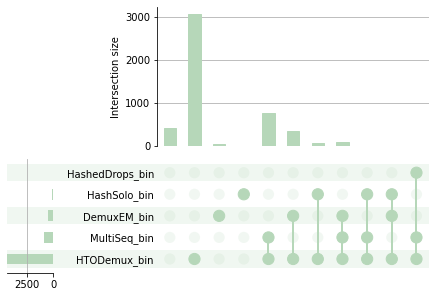

In [34]:
plt3 = UpSet(c,facecolor="#B6D7B9",shading_color=.2).plot()

In [35]:
c

HTODemux_bin  MultiSeq_bin  HashedDrops_bin  DemuxEM_bin  HashSolo_bin
0             0             0                0            0                428
                                                          1                  7
                                             1            0                 41
1             0             0                0            0               3078
                                                          1                 67
                                             1            0                357
                                                          1                  9
              1             0                0            0                783
                                                          1                 11
                                             1            0                107
                            1                0            0                  1
Name: Barcode_demux, dtype: int64

In [36]:
htodemul_results

,Barcode_htoDemux,HTODemux
0,AAACCCAAGGTGTGAC-1,Doublet
1,AAACCCAGTGAGAGGG-1,Doublet
2,AAACGAAAGAATCTAG-1,Doublet
3,AAACGAACACATATGC-1,Doublet
4,AAACGAACACGACTAT-1,Doublet
...,...,...
4873,TTTGTTGAGTCCCAGC-1,Doublet
4874,TTTGTTGCAGCGCGTT-1,Doublet
4875,TTTGTTGGTTATCTTC-1,Doublet
4876,TTTGTTGTCCAGTGTA-1,Doublet


In [37]:
htoDemul = htodemul_results['HTODemux'].value_counts()
htoDemul_dict = htoDemul.to_dict()
htoDemul_dict['Tool'] = 'HTODemux'
htoDemul_dict

{'Doublet': 4413, 'Negative': 271, 'Singlet': 194, 'Tool': 'HTODemux'}

In [38]:
multiseq = multiseq_results['MultiSeq'].value_counts()
multiseq_dict = multiseq.to_dict()
multiseq_dict['Tool'] = 'MULTI-seq'
multiseq_dict


{'Negative': 2413, 'Singlet': 1563, 'Doublet': 902, 'Tool': 'MULTI-seq'}

In [39]:
demuxem = demuxem_results['DemuxEM'].value_counts()
demuxem_dict = demuxem.to_dict()
demuxem_dict['Tool'] = 'DemuxEM'
demuxem_dict

{'Negative': 2446, 'Singlet': 1929, 'Doublet': 514, 'Tool': 'DemuxEM'}

In [40]:
hashdrop = hasheddrops_results['HashedDrops'].value_counts()
hashdrop_dict = hashdrop.to_dict()
hashdrop_dict['Tool'] = 'HashedDrops'
hashdrop_dict


{'Negative': 4827, 'Singlet': 50, 'Doublet': 1, 'Tool': 'HashedDrops'}

In [41]:
hashsolo = hashsolo_results['HashSolo'].value_counts()
hashsolo_dict = hashsolo.to_dict()
hashsolo_dict['Tool'] = 'Hash_Solo'
hashsolo_dict

{'Singlet': 88073, 'Doublet': 1731, 'Negative': 1106, 'Tool': 'Hash_Solo'}

In [42]:
dd = defaultdict(list)
for d in (htoDemul_dict,multiseq_dict,demuxem_dict,hashdrop_dict): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd)

defaultdict(<class 'list'>, {'Doublet': [4413, 902, 514, 1], 'Negative': [271, 2413, 2446, 4827], 'Singlet': [194, 1563, 1929, 50], 'Tool': ['HTODemux', 'MULTI-seq', 'DemuxEM', 'HashedDrops']})


In [43]:
results = pd.DataFrame(dict(dd))

In [44]:
hashsolo_df = pd.DataFrame(hashsolo_dict,index=[1])
hashsolo_df

,Singlet,Doublet,Negative,Tool
1,88073,1731,1106,Hash_Solo


In [45]:
results

,Doublet,Negative,Singlet,Tool
0,4413,271,194,HTODemux
1,902,2413,1563,MULTI-seq
2,514,2446,1929,DemuxEM
3,1,4827,50,HashedDrops


[Text(0, 0, 'HTODemux'),
 Text(1, 0, 'MULTI-seq'),
 Text(2, 0, 'DemuxEM'),
 Text(3, 0, 'HashedDrops')]

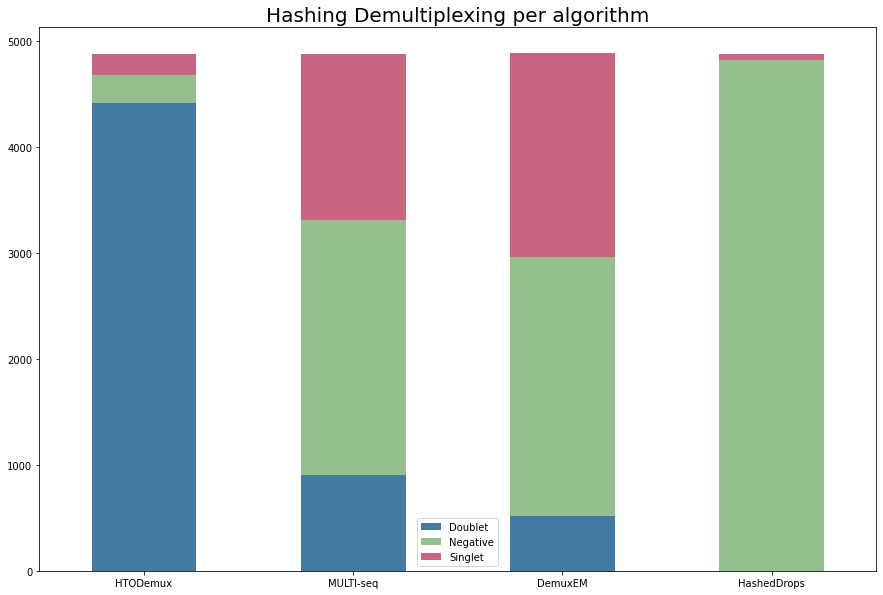

In [46]:
ax = results.loc[:,['Doublet','Negative', 'Singlet']].plot.bar(stacked=True,color=["#427AA1","#95BF8F","#C96480"],figsize=(15, 10),legend=True)
ax.set_title('Hashing Demultiplexing per algorithm', fontsize=20)
ax.set_xticklabels(['HTODemux','MULTI-seq','DemuxEM','HashedDrops'], rotation=0)

In [47]:
del hashsolo_dict['Tool']
hashsolo_dict

{'Singlet': 88073, 'Doublet': 1731, 'Negative': 1106}

In [48]:
labels = list(hashsolo_dict.keys())
values = list(hashsolo_dict.values())

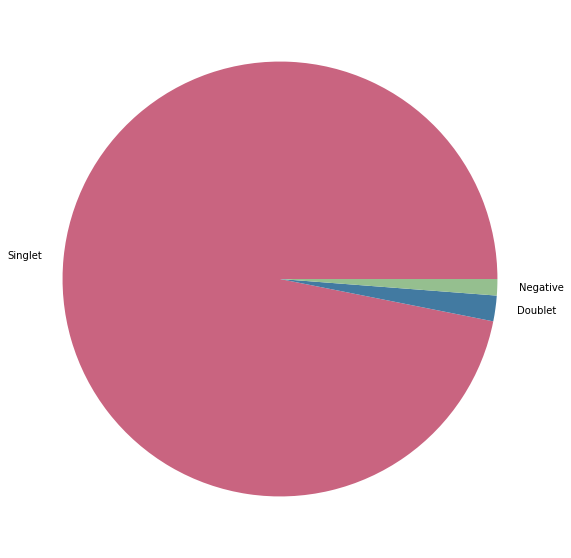

In [49]:
plott.figure(figsize = (15,10))
plott.pie(values, labels=labels, colors=("#C96480","#427AA1","#95BF8F"))
plott.show()

In [50]:
htodemul_hashes

,Barcode_htoDemux,Assignment-htoDemux
0,AAACCCAAGGTGTGAC-1,Hash454-TotalSeqA_Hash455-TotalSeqA
1,AAACCCAGTGAGAGGG-1,Hash453-TotalSeqA_Hash455-TotalSeqA
2,AAACGAAAGAATCTAG-1,Hash453-TotalSeqA_Hash455-TotalSeqA
3,AAACGAACACATATGC-1,Hash452-TotalSeqA_Hash456-TotalSeqA
4,AAACGAACACGACTAT-1,Hash452-TotalSeqA_Hash455-TotalSeqA
...,...,...
4873,TTTGTTGAGTCCCAGC-1,Hash451-TotalSeqA_Hash456-TotalSeqA
4874,TTTGTTGCAGCGCGTT-1,Hash451-TotalSeqA_Hash454-TotalSeqA
4875,TTTGTTGGTTATCTTC-1,Hash452-TotalSeqA_Hash453-TotalSeqA
4876,TTTGTTGTCCAGTGTA-1,Hash453-TotalSeqA_Hash454-TotalSeqA


In [51]:
multiseq_hashes

,Barcode_multi,Assignment-multiseq
0,AAACCCAAGGTGTGAC-1,Hash454-TotalSeqA
1,AAACCCAGTGAGAGGG-1,Negative
2,AAACGAAAGAATCTAG-1,Hash455-TotalSeqA
3,AAACGAACACATATGC-1,Negative
4,AAACGAACACGACTAT-1,Hash452-TotalSeqA
...,...,...
4873,TTTGTTGAGTCCCAGC-1,Negative
4874,TTTGTTGCAGCGCGTT-1,Doublet
4875,TTTGTTGGTTATCTTC-1,Hash452-TotalSeqA
4876,TTTGTTGTCCAGTGTA-1,Hash454-TotalSeqA


In [52]:
hashsolo_hash

,Barcode_hashsolo,Assignment-hashsolo
0,AAACCCAAGACCATGG,Hash453_TotalSeqA
1,AAACCCAAGACCTGGA,Hash453_TotalSeqA
2,AAACCCAAGAGAGCAA,Hash453_TotalSeqA
3,AAACCCAAGAGATGCC,Hash453_TotalSeqA
4,AAACCCAAGATGAACT,Hash453_TotalSeqA
...,...,...
90905,TTTGTTGTCGCTTAAG,Hash453_TotalSeqA
90906,TTTGTTGTCGTTGCCT,Hash453_TotalSeqA
90907,TTTGTTGTCTACGGTA,Hash453_TotalSeqA
90908,TTTGTTGTCTAGTGTG,Hash453_TotalSeqA


In [53]:
demuxem_hashes

,Barcode_demux,Assignment-demuxem
0,AAACCCAAGGTGTGAC,"Hash451_TotalSeqA,Hash454_TotalSeqA"
1,AAACCCAGTGAGAGGG,Hash453_TotalSeqA
2,AAACGAAAGAATCTAG,NaN
3,AAACGAACACATATGC,NaN
4,AAACGAACACGACTAT,Hash452_TotalSeqA
...,...,...
4884,TTTGTTGAGTCCCAGC,NaN
4885,TTTGTTGCAGCGCGTT,Hash451_TotalSeqA
4886,TTTGTTGGTTATCTTC,NaN
4887,TTTGTTGTCCAGTGTA,Hash454_TotalSeqA


In [54]:
hasheddrops_hashes

,Barcode_hashed,Assignment-hashed
0,AAACCCAAGGTGTGAC-1,3
1,AAACCCAGTGAGAGGG-1,3
2,AAACGAAAGAATCTAG-1,3
3,AAACGAACACATATGC-1,3
4,AAACGAACACGACTAT-1,2
...,...,...
4873,TTTGTTGAGTCCCAGC-1,3
4874,TTTGTTGCAGCGCGTT-1,1
4875,TTTGTTGGTTATCTTC-1,3
4876,TTTGTTGTCCAGTGTA-1,3


In [55]:
hashdrop_as = hasheddrops_hashes['Assignment-hashed'].value_counts()
hashdrop_dict_as = hashdrop_as.to_dict()
hashdrop_dict_as

{3: 4312, 1: 206, 6: 123, 2: 111, 4: 98, 5: 28}

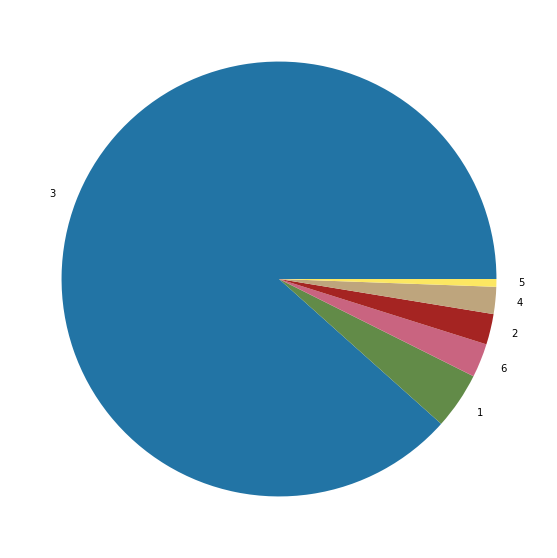

In [56]:
labels_hashdrop = list(hashdrop_dict_as.keys())
values_hashdrop = list(hashdrop_dict_as.values())
plott.figure(figsize = (15,10))
plott.pie(values_hashdrop, labels=labels_hashdrop, colors=("#2274A5","#628B48","#C96480","#A52422","#BEA57D","#FCE762"))
plott.show()

In [57]:
htodemul_hash = htodemul_hashes['Assignment-htoDemux'].value_counts()
htodemul_dict_as = htodemul_hash.to_dict()
htodemul_dict_as

{'Hash452-TotalSeqA_Hash453-TotalSeqA': 352,
 'Hash452-TotalSeqA_Hash455-TotalSeqA': 341,
 'Hash454-TotalSeqA_Hash455-TotalSeqA': 340,
 'Hash451-TotalSeqA_Hash453-TotalSeqA': 325,
 'Hash455-TotalSeqA_Hash456-TotalSeqA': 320,
 'Hash453-TotalSeqA_Hash456-TotalSeqA': 319,
 'Hash453-TotalSeqA_Hash455-TotalSeqA': 316,
 'Hash452-TotalSeqA_Hash454-TotalSeqA': 301,
 'Hash451-TotalSeqA_Hash455-TotalSeqA': 295,
 'Hash452-TotalSeqA_Hash456-TotalSeqA': 294,
 'Negative': 271,
 'Hash453-TotalSeqA_Hash454-TotalSeqA': 256,
 'Hash451-TotalSeqA_Hash456-TotalSeqA': 247,
 'Hash451-TotalSeqA_Hash452-TotalSeqA': 242,
 'Hash454-TotalSeqA_Hash456-TotalSeqA': 236,
 'Hash451-TotalSeqA_Hash454-TotalSeqA': 229,
 'Hash454-TotalSeqA': 66,
 'Hash451-TotalSeqA': 32,
 'Hash456-TotalSeqA': 30,
 'Hash455-TotalSeqA': 28,
 'Hash453-TotalSeqA': 25,
 'Hash452-TotalSeqA': 13}

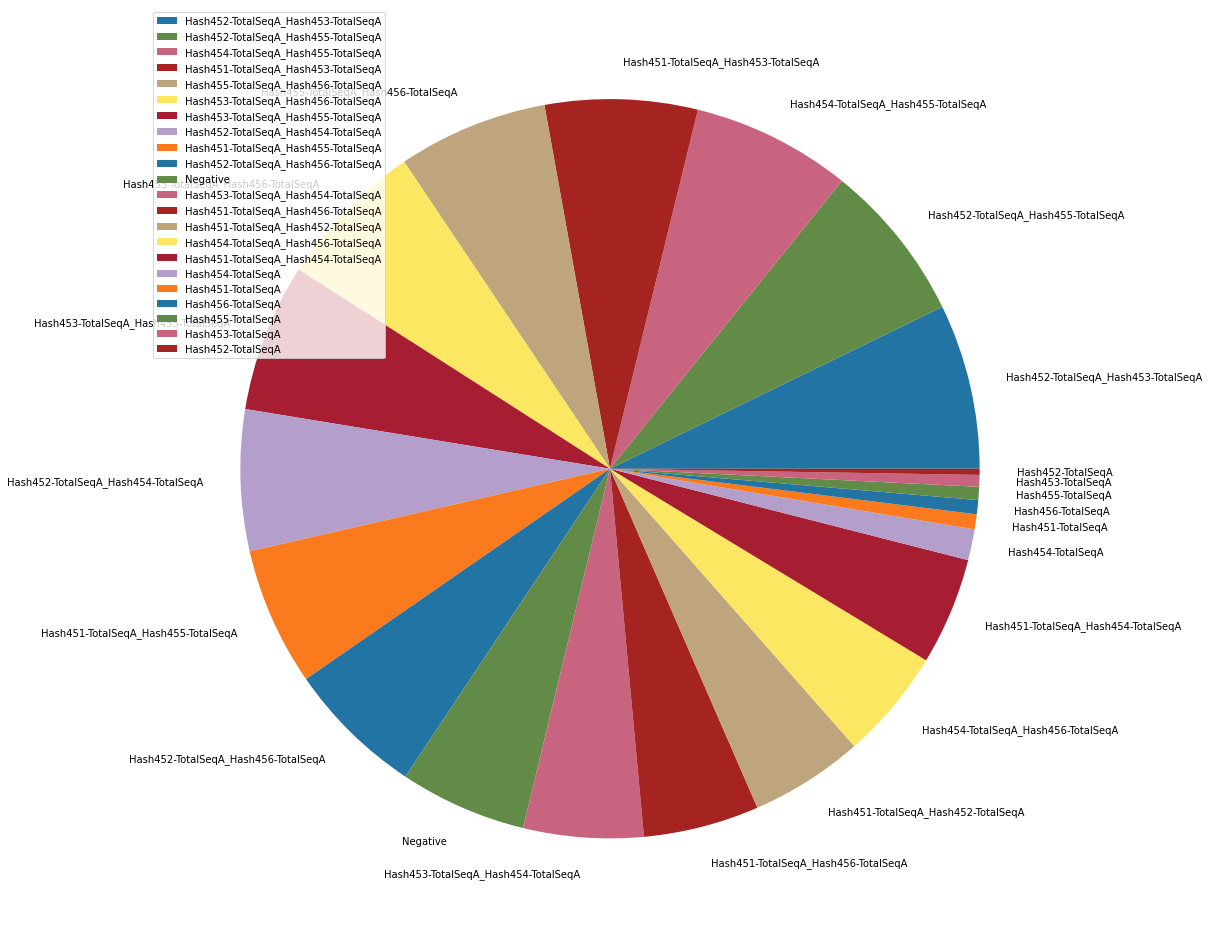

In [58]:
labels_htodemul = list(htodemul_dict_as.keys())
values_htodemul = list(htodemul_dict_as.values())
plott.figure(figsize = (25,17))
plott.pie(values_htodemul, labels=labels_htodemul, colors=("#2274A5","#628B48","#C96480","#A52422","#BEA57D","#FCE762","#A71D31","#B49FCC","#FC7A1E"))
plott.legend()
plott.show()

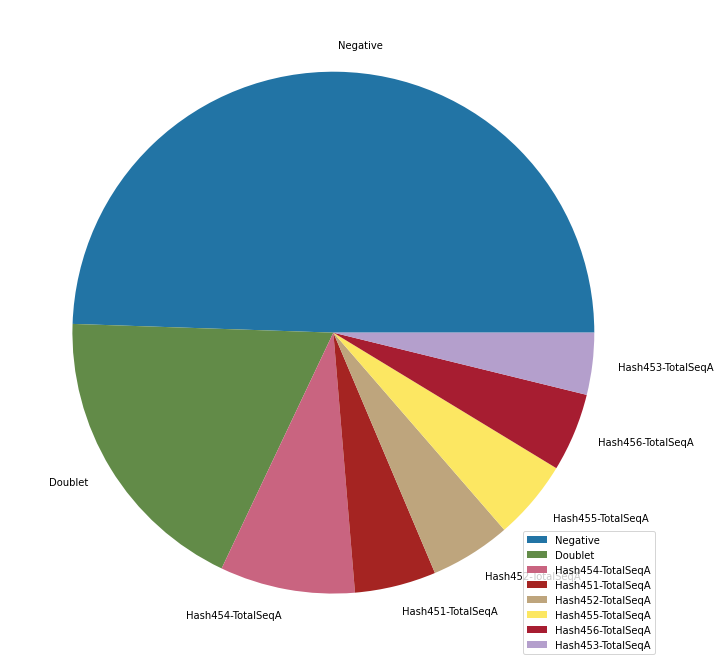

In [59]:
multiseq_hash = multiseq_hashes['Assignment-multiseq'].value_counts()
multiseq_dict_as = multiseq_hash.to_dict()
labels_multiseq = list(multiseq_dict_as.keys())
values_multiseq = list(multiseq_dict_as.values())
plott.figure(figsize = (21,12))
plott.pie(values_multiseq, labels=labels_multiseq, colors=("#2274A5","#628B48","#C96480","#A52422","#BEA57D","#FCE762","#A71D31","#B49FCC","#FC7A1E"))
plott.legend()
plott.show()

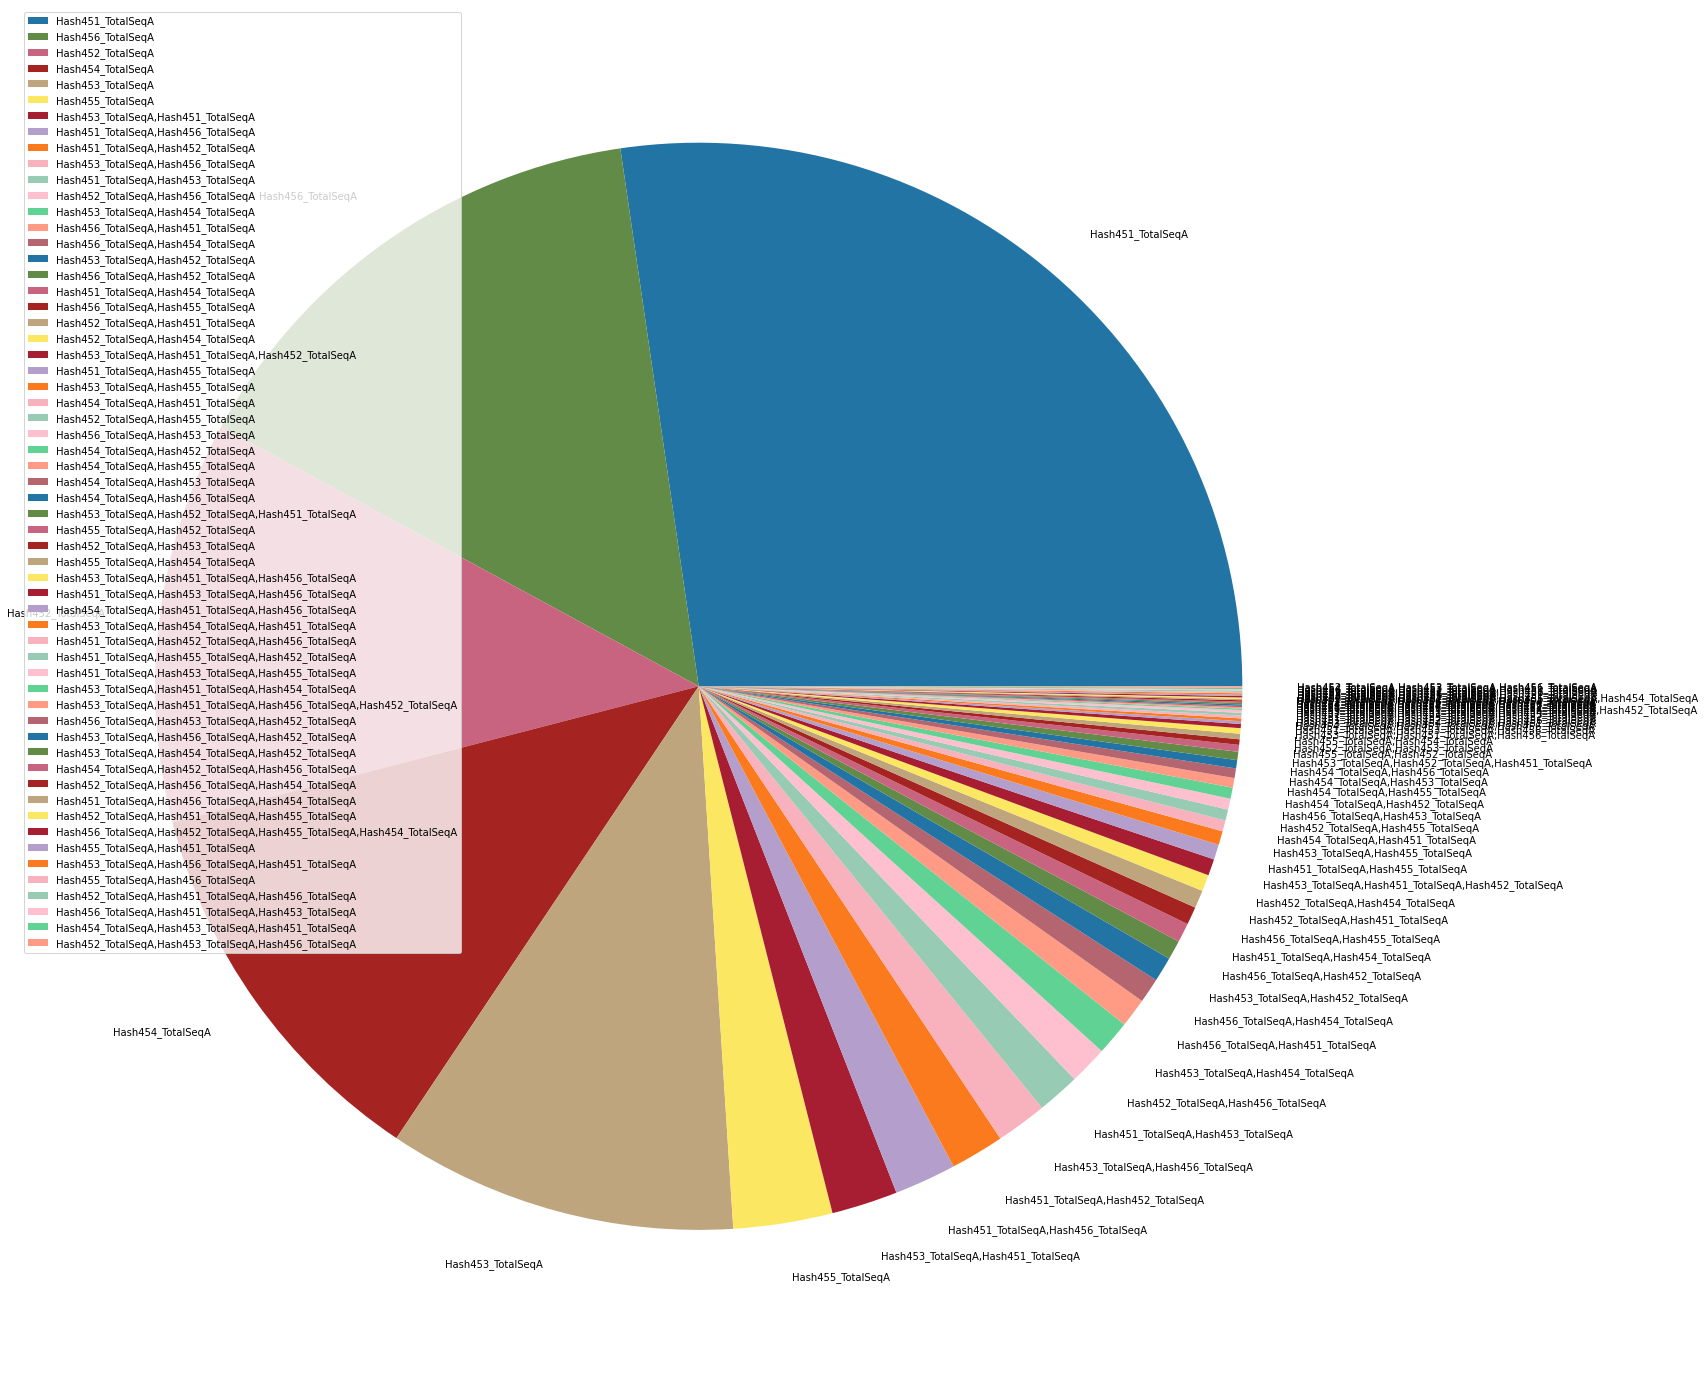

In [60]:
demuxem_hash = demuxem_hashes['Assignment-demuxem'].value_counts()
demuxem_dict_as = demuxem_hash.to_dict()
labels_demuxem = list(demuxem_dict_as.keys())
values_demuxem = list(demuxem_dict_as.values())
plott.figure(figsize = (25,25))
plott.pie(values_demuxem, labels=labels_demuxem, colors=("#2274A5","#628B48","#C96480","#A52422","#BEA57D","#FCE762","#A71D31","#B49FCC","#FC7A1E","#F7B2BD","#98CBB4","#FEC0CE","#60D394","#FF9B85","#B4656F"))
plott.legend()
plott.show()

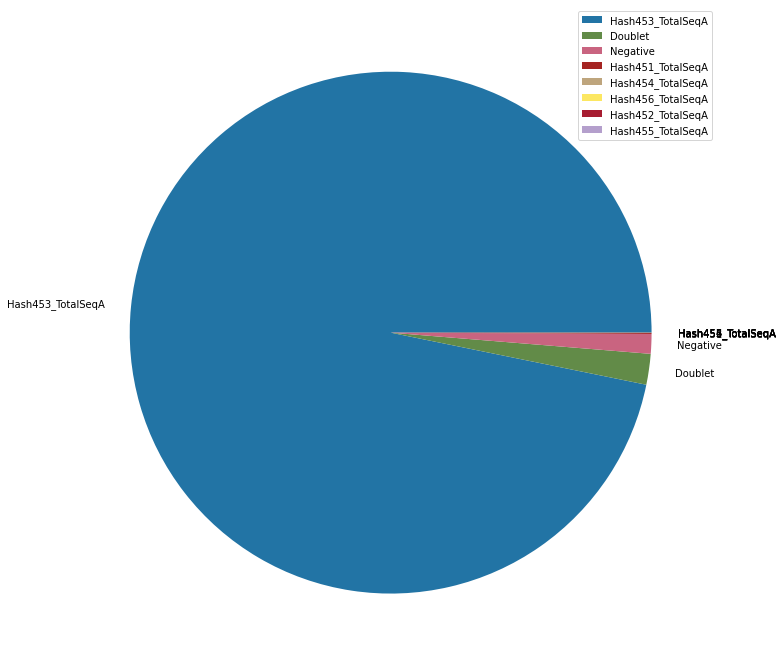

In [61]:
hashsolo_hash = hashsolo_hash['Assignment-hashsolo'].value_counts()
hashsolo_dict_as = hashsolo_hash.to_dict()
labels_hashsolo = list(hashsolo_dict_as.keys())
values_hashsolo = list(hashsolo_dict_as.values())
plott.figure(figsize = (21,12))
plott.pie(values_hashsolo, labels=labels_hashsolo, colors=("#2274A5","#628B48","#C96480","#A52422","#BEA57D","#FCE762","#A71D31","#B49FCC","#FC7A1E"))
plott.legend()
plott.show()